# yelp
这次作业对yelp数据集进行频繁模式和关联规则的挖掘
## 数据集的获取和预处理


In [1]:
import pandas as pd

# 从GitHub下载数据集
url = "https://github.com/SureshAthanti/Association-Rule-and-yelp-data-analysis/raw/master/data/Yelp_Usefulness_Assignment2_2.csv"
df = pd.read_csv(url)

# 显示数据集的前几行
print(df.head())


                review_id  review_stars  word_count  lexical_diversity  \
0  bRGHgwAd3zfiiDMT9JyKcA             1          23           0.869565   
1  TK-0pfhHorvwZK0YhDe2fQ             5          26           0.769231   
2  XTOQ6blQzzzoK26QRJl3zg             5          71           0.760563   
3  KA9VwKYL-7I2LuQnXeuEBw             5          74           0.689189   
4  C2kblEfR4oMWR9oGhYN2cQ             5          31           0.903226   

   correct_spell_ratio  price_included  procon_included  joy  love  affection  \
0             0.869565        0.000000                0  0.0   0.0        0.0   
1             0.846154        0.000000                0  0.0   0.0        0.0   
2             0.943662        0.014085                0  0.0   0.0        0.0   
3             0.905405        0.000000                0  0.0   0.0        0.0   
4             0.903226        0.000000                0  0.0   0.0        0.0   

   ...  distress  FleschReadingEase  user_review_count  yelping_mont

- 上边的数据集是经过处理之后的数据集，他将yelp的几个JSON文件内包含的信息进行了合并并写入一个csv文件当中

### 处理之后的数据的五数等情况如下所示

In [2]:
df.describe()

,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,...,horror,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,3.604000,87.588000,0.770577,0.881534,0.006003,0.003000,0.000016,0.002612,0.000011,0.000002,...,0.000642,0.000071,78.880178,123.636000,33.541000,21.222000,0.000397,0.005586,3.78800,379.584000
std,1.534124,85.127098,0.100830,0.055464,0.012553,0.054717,0.000502,0.009139,0.000238,0.000055,...,0.004129,0.000721,13.644488,331.058843,23.902252,65.381874,0.002117,0.017273,0.74774,652.676672
min,1.000000,3.000000,0.438134,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-37.145400,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,3.000000
25%,2.000000,32.000000,0.703216,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,72.448250,6.000000,13.000000,0.000000,0.000000,0.000000,3.50000,42.000000
50%,4.000000,58.000000,0.771373,0.886020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,80.073150,21.000000,30.000000,1.000000,0.000000,0.000000,4.00000,150.000000
75%,5.000000,112.000000,0.838710,0.914679,0.006993,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,86.875000,96.000000,51.000000,8.000000,0.000087,0.001192,4.50000,416.750000
max,5.000000,664.000000,1.000000,1.000000,0.100000,1.000000,0.015873,0.105263,0.005848,0.001724,...,0.058824,0.011111,118.175000,3448.000000,114.000000,722.000000,0.038897,0.140342,5.00000,6200.000000


- 下边对数据进行清洗，以方便进一步的挖掘工作

In [4]:
import warnings
warnings.filterwarnings("ignore")
df['class'][df['class'] == 'not useful'] = 'not_useful'

- 缺失数据的填补

In [7]:
import numpy as np
median = np.median(df["eigenvector"][~df["eigenvector"].isna()])
df["eigenvector"].fillna(median, inplace=True)

- 重复数据的删除

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,review_id,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,...,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count,class
0,bRGHgwAd3zfiiDMT9JyKcA,1,23,0.869565,0.869565,0.000000,0,0.0,0.0,0.0,...,0.0,81.1310,5,24,0,0.0,0.0,3.0,40,useful
1,TK-0pfhHorvwZK0YhDe2fQ,5,26,0.769231,0.846154,0.000000,0,0.0,0.0,0.0,...,0.0,48.9568,22,6,1,0.0,0.0,4.5,319,useful
2,XTOQ6blQzzzoK26QRJl3zg,5,71,0.760563,0.943662,0.014085,0,0.0,0.0,0.0,...,0.0,95.9393,10,14,0,0.0,0.0,4.5,535,not_useful
3,KA9VwKYL-7I2LuQnXeuEBw,5,74,0.689189,0.905405,0.000000,0,0.0,0.0,0.0,...,0.0,86.9222,1,3,0,0.0,0.0,5.0,28,useful
4,C2kblEfR4oMWR9oGhYN2cQ,5,31,0.903226,0.903226,0.000000,0,0.0,0.0,0.0,...,0.0,63.0018,19,40,0,0.0,0.0,3.5,84,useful


- 为了对频繁模式进行挖掘，先将一些数据处理为布尔值或整数而不是字符串形式,
主要是class和degree属性,一些无用的字符串属性将会被删除

In [19]:
df['class'][df['class'] == 'useful'] = 1
df['class'][df['class'] == 'not_useful'] = 0
df["class"].astype('int')
desc_yelp_data = df.drop(['review_id'], axis = 1)
column_names = desc_yelp_data.columns
for column in range(len(column_names)):
    desc_yelp_data[column_names[column]] = np.where(desc_yelp_data[column_names[column]] >= np.mean(desc_yelp_data[column_names[column]]),1,0)
    desc_yelp_data[column_names[column]].astype('int')

In [12]:
desc_yelp_data.head()

,review_stars,word_count,lexical_diversity,correct_spell_ratio,price_included,procon_included,joy,love,affection,liking,...,distress,FleschReadingEase,user_review_count,yelping_months,degree,betweenness,eigenvector,business_stars,business_review_count,class
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


- 删除无用的属性列

In [20]:
yelp_data = desc_yelp_data.drop('dislike',axis=1)
yelp_data.columns


Index(['review_stars', 'word_count', 'lexical_diversity',
       'correct_spell_ratio', 'price_included', 'procon_included', 'joy',
       'love', 'affection', 'liking', 'enthusiasm', 'sadness', 'despair',
       'horror', 'distress', 'FleschReadingEase', 'user_review_count',
       'yelping_months', 'degree', 'betweenness', 'eigenvector',
       'business_stars', 'business_review_count', 'class'],
      dtype='object')

## 频繁模式挖掘
- 下边我们对数据进行频繁模式挖掘，使用mlxtend库中的apriori算法

In [21]:
!pip install mlxtend

### 求出频繁项集
#### 我们将挖掘模式命名为评价相关模式或者说评价关联模式

In [26]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="ipykernel")

frequent_itemsets = apriori(yelp_data, min_support=0.2, use_colnames=True)

print(frequent_itemsets)

    support                                           itemsets
0     0.629                                     (review_stars)
1     0.349                                       (word_count)
2     0.501                                (lexical_diversity)
3     0.539                              (correct_spell_ratio)
4     0.263                                   (price_included)
5     0.541                                (FleschReadingEase)
6     0.221                                (user_review_count)
7     0.456                                   (yelping_months)
8     0.590                                   (business_stars)
9     0.271                            (business_review_count)
10    0.493                                            (class)
11    0.365                  (lexical_diversity, review_stars)
12    0.344                (correct_spell_ratio, review_stars)
13    0.319                  (FleschReadingEase, review_stars)
14    0.284                     (yelping_months, review

- 从上面生成的频繁项集可以看出，review_stars和lexical_diversity的支持值最高，大于0.5。

- 求支持度大于0.5的频繁项集

In [27]:
import warnings
warnings.filterwarnings("ignore")
frequent_itemsets1 = apriori(yelp_data, min_support=0.5, use_colnames=True)
print(frequent_itemsets1)

   support               itemsets
0    0.629         (review_stars)
1    0.501    (lexical_diversity)
2    0.539  (correct_spell_ratio)
3    0.541    (FleschReadingEase)
4    0.590       (business_stars)


- 下边对关联规则进行求解

In [28]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(lexical_diversity),(review_stars),0.501,0.629,0.365,0.728543,1.158256,0.049871,1.366699,0.273813
1,(review_stars),(lexical_diversity),0.629,0.501,0.365,0.580286,1.158256,0.049871,1.188905,0.368283
2,(correct_spell_ratio),(review_stars),0.539,0.629,0.344,0.638219,1.014656,0.004969,1.025482,0.031334
3,(review_stars),(correct_spell_ratio),0.629,0.539,0.344,0.546900,1.014656,0.004969,1.017435,0.038935
4,(FleschReadingEase),(review_stars),0.541,0.629,0.319,0.589649,0.937438,-0.021289,0.904104,-0.126939
...,...,...,...,...,...,...,...,...,...,...
69,"(business_stars, yelping_months)",(review_stars),0.279,0.629,0.210,0.752688,1.196643,0.034509,1.500130,0.227918
70,"(business_stars, review_stars)",(yelping_months),0.461,0.456,0.210,0.455531,0.998972,-0.000216,0.999139,-0.001905
71,(yelping_months),"(business_stars, review_stars)",0.456,0.461,0.210,0.460526,0.998972,-0.000216,0.999122,-0.001887
72,(review_stars),"(business_stars, yelping_months)",0.629,0.279,0.210,0.333863,1.196643,0.034509,1.082360,0.442934


### 可视化置信度与支持度的散点图

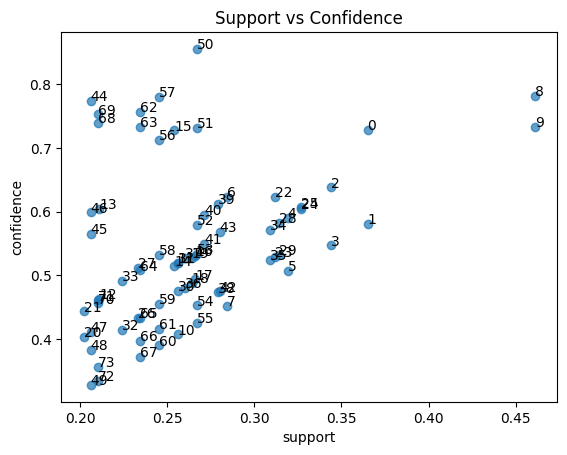

In [29]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

#### 你可以将支持度、置信度或提升度作为颜色的强度，这样可以更直观地看出规则之间的相对关系

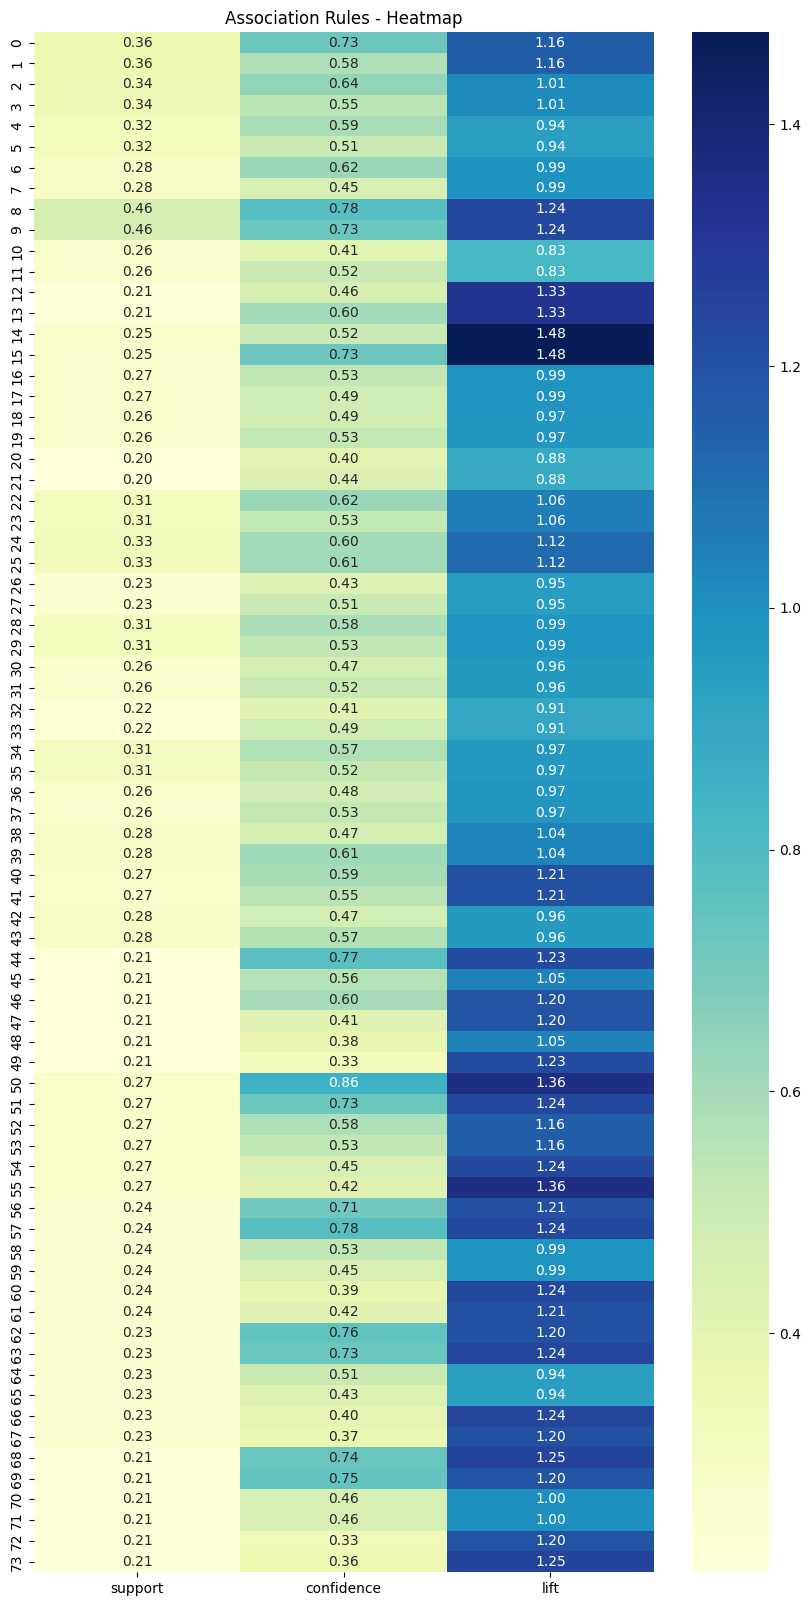

In [34]:
import seaborn as sns

# 创建热力图
plt.figure(figsize=(10, 20))
sns.heatmap(rules[['support', 'confidence', 'lift']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Association Rules - Heatmap')
plt.show()


#### 网格图
将规则表示为节点，规则之间的关系表示为边。节点的大小或颜色来表示支持度或置信度，使用边的粗细或颜色来表示提升度。这种可视化方法可以帮助你更清晰地看到规则之间的交叉和关联

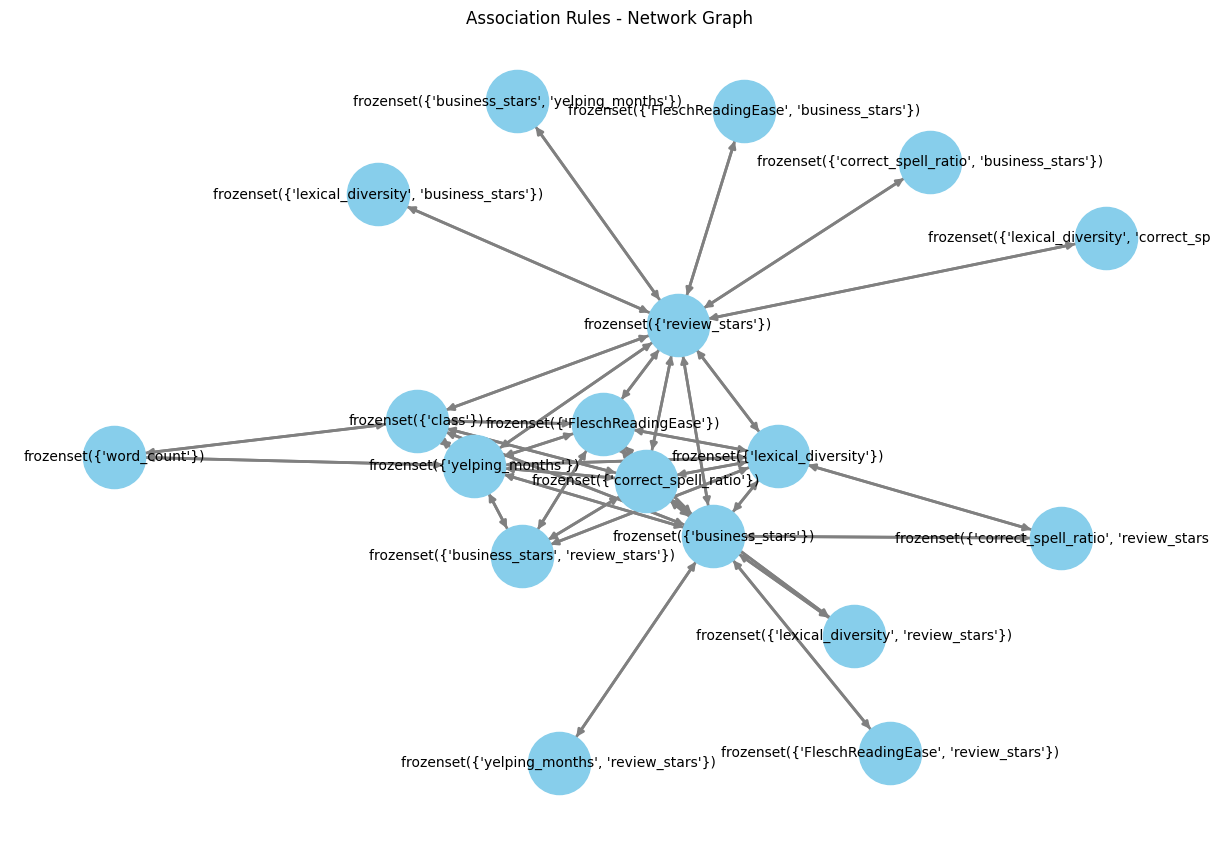

In [35]:
import networkx as nx

# 创建网络图
G = nx.DiGraph()
for i in range(len(rules)):
    G.add_edge(rules.iloc[i, 0], rules.iloc[i, 1], weight=rules.iloc[i, 4])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, edge_color="gray", width=2, arrows=True)
plt.title('Association Rules - Network Graph')
plt.show()


#### 柱状图
- 柱状图来显示规则的提升度或其他评估指标的分布。通过将规则按照提升度或其他指标进行排序，并将其可视化为柱状图，可以更容易地发现规则中的模式和趋势。

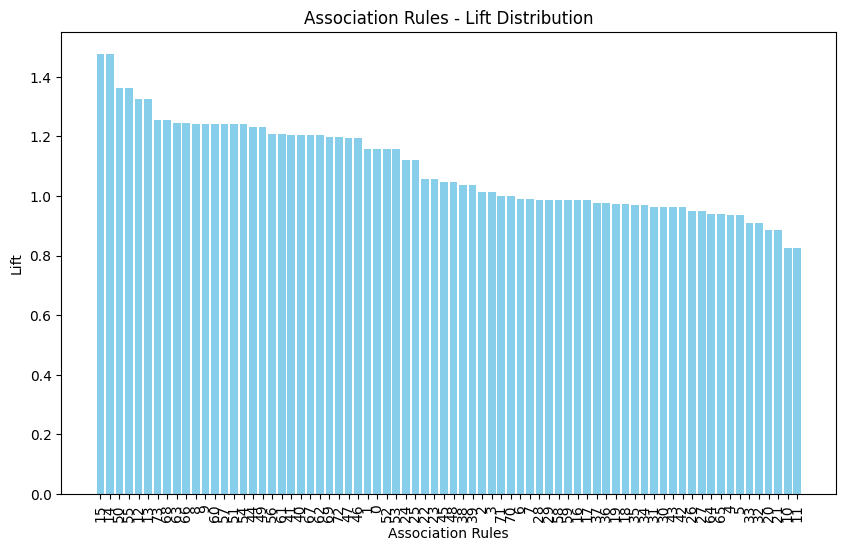

In [36]:
plt.figure(figsize=(10, 6))
rules.sort_values(by='lift', ascending=False, inplace=True)
plt.bar(range(len(rules)), rules['lift'], color='skyblue')
plt.xlabel('Association Rules')
plt.ylabel('Lift')
plt.title('Association Rules - Lift Distribution')
plt.xticks(range(len(rules)), rules.index, rotation=90)
plt.show()


## 总结
- review_stars与lexical_diversity组成的关联规则的最小支持度大于0.35,review_stars => lexical_diversity的最小置信水平为(0.580)，lexical_diversity => review_stars的最小置信水平为0.728。Lift值为1.158256，这说明两个规则的正相关性。这使得规则具有很强的关联性。
- lexical_diversity和yelping_months的最小支持值小于0.3。。由lexical_diversity和yelping_months组成的关联规则的最小支持度为0.202,lexical_diversity => yelping_months的最小置信度为0.403,yelping_months => lexical_diversity的最小置信度为0.442。Lift值为0.8841，这表示两个规则的负相关。